In [1]:
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import pickle

import warnings
warnings.filterwarnings('ignore')

#Visualiser le maximum possible d'information
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Imports

In [2]:
filename = 'model_file.sav'
model = pickle.load(open(filename, 'rb'))

filename = 'complete.pkl' #train+test set
final = pickle.load(open(filename, 'rb'))

filename = 'final_file.pkl' #test set
df_test = pickle.load(open(filename, 'rb'))

filename = 'final_train.pkl' #train set
df_train = pickle.load(open(filename, 'rb'))

# Predictions

In [3]:
#Get feature importances
feature_importances = pd.DataFrame({'feature': final.drop(columns=['TARGET', 'RISK_PROBA']).columns.to_list(), 
                                    'importance': model.feature_importances_}).sort_values('importance', 
                                                                                           ascending=False).reset_index(drop=True)
feature_importances

feature  importance
0   CREDIT_TERM                     1663      
1   EXT_SOURCE_2                    1383      
2   YEARS_BIRTH                     1310      
3   EXT_SOURCE_3                    1280      
4   YEARS_REGISTRATION              1249      
5   AMT_ANNUITY_max_PA              1183      
6   N_PREV_LAST_APPLICATION         1165      
7   YEARS_ID_PUBLISH                1139      
8   DAYS_LAST_PHONE_CHANGE          1126      
9   YEARS_EMPLOYED                  1101      
10  SELLERPLACE_AREA_max_PA         1065      
11  CREDIT_INCOME_RATIO             1058      
12  AMT_ANNUITY_min_PA              1051      
13  AMT_CREDIT_SUM_max_B            1020      
14  DAYS_CREDIT_ENDDATE_max_B       978       
15  EXT_SOURCE_1                    961       
16  AMT_ANNUITY                     957       
17  N_BUREAU_LAST_APPLICATION       916       
18  BUREAU_CREDIT_DEBT_RATIO_max_B  831       
19  AMT_CREDIT_SUM_min_B            812       
20  REGION_POPULATION_RELATIVE      812       
21  AMT_CREDIT                      770       
22  INCOME_PER_PERSON               700       
23  ORGANIZATION_TYPE               583       
24  HOUR_APPR_PROCESS_START         563       
25  AMT_INCOME_TOTAL                552       
26  OCCUPATION_TYPE                 518       
27  N_TOTAL_LOANS                   458       
28  N_REJECT_RATIO                  451       
29  N_BUREAU_LOANS                  389       
30  N_PREV_APPROVED                 326       
31  OBS_30_CNT_SOCIAL_CIRCLE        317       
32  WALLSMATERIAL_MODE              282       
33  NAME_FAMILY_STATUS              216       
34  NAME_EDUCATION_TYPE             173       
35  CODE_GENDER                     167       
36  NAME_HOUSING_TYPE               130       
37  CNT_CHILDREN                    119       
38  FLAG_OWN_CAR                    114       
39  NAME_CONTRACT_TYPE              112

In [4]:
pipe = make_pipeline(model)
# y_pred = pipe.predict(final.drop(columns=['TARGET', 'RISK_PROBA']))
# y_proba = pipe.predict_proba(final.drop(columns=['TARGET', 'RISK_PROBA']))

pred_distrib = final['TARGET'].value_counts()
pred_distrib

y_pred = final['TARGET']
y_proba = final['RISK_PROBA']
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()

failure_ratio = pred_fail/(pred_good+pred_fail)
print('Failure Ratio: {}%'.format(round(100*failure_ratio, 2)))

Failure Ratio: 19.84%


In [5]:
final[final['TARGET'] == 1].sample()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
440245  0                   1            0             0              

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_EDUCATION_TYPE  \
440245  90000.0           630000.0    32166.0      0                     

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
440245  3                   0                  0.011703                     

        OCCUPATION_TYPE  HOUR_APPR_PROCESS_START  ORGANIZATION_TYPE  \
440245  10               10                       12                  

        WALLSMATERIAL_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
440245  2                   0.0                      -210.0                    

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
440245  46.6875      3.361328        28.28125            1.104492           

        CREDIT_INCOME_RATIO  INCOME_PER_PERSON  CREDIT_TERM  N_PREV_APPROVED  \
440245  7.0                  90000.0            0.051056     5.0               

        N_PREV_LAST_APPLICATION  N_REJECT_RATIO  N_BUREAU_LOANS  \
440245 -54.0                     0.0             6.0              

        N_BUREAU_LAST_APPLICATION  N_TOTAL_LOANS  DAYS_CREDIT_ENDDATE_max_B  \
440245 -221.0                      11.0           286.0                       

        AMT_CREDIT_SUM_min_B  AMT_CREDIT_SUM_max_B  \
440245  18022.5               189000.0               

        BUREAU_CREDIT_DEBT_RATIO_max_B  AMT_ANNUITY_min_PA  \
440245  0.653044                        6115.725098          

        AMT_ANNUITY_max_PA  SELLERPLACE_AREA_max_PA  EXT_SOURCE_1  \
440245  18347.445312        1500.0                   0.811035       

        EXT_SOURCE_2  EXT_SOURCE_3  TARGET  RISK_PROBA  
440245  0.63623       0.51709       1       0.920898

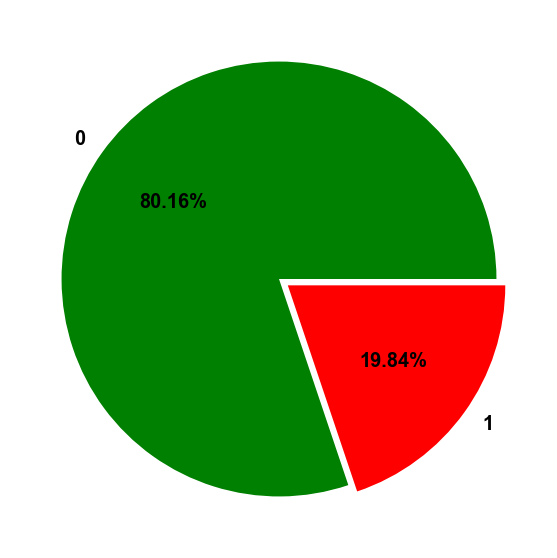

In [6]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-white')
plt.pie(pred_distrib,
        explode=(0, 0.05),
        colors=('green', 'red'),
        autopct='%1.2f%%',
        textprops={'weight': 'bold',
                   'fontsize': 20,
                   'color': 'black',
                  },
        labels=pred_distrib.index,
       )
plt.show()

# Prepare data

In [7]:
im_data = final.drop(columns=['TARGET', 'RISK_PROBA']) #import data

In [8]:
im_data.sample(5)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  CNT_CHILDREN  \
158093  1                   1            0             0              
241613  0                   0            1             2              
451482  0                   0            1             0              
427805  0                   1            0             0              
306751  0                   1            0             1              

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_EDUCATION_TYPE  \
158093  112500.0          270000.0    13500.0      1                     
241613  76500.0           381528.0    24511.5      0                     
451482  108000.0          454500.0    14661.0      0                     
427805  157500.0          446787.0    32827.5      1                     
306751  72000.0           315000.0    15448.5      0                     

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
158093  4                   0                  0.008865                     
241613  1                   0                  0.018204                     
451482  1                   0                  0.010498                     
427805  0                   0                  0.024612                     
306751  1                   0                  0.018845                     

        OCCUPATION_TYPE  HOUR_APPR_PROCESS_START  ORGANIZATION_TYPE  \
158093  3                13                       9                   
241613  0                12                       38                  
451482  4                18                       5                   
427805  1                11                       1                   
306751  1                17                       13                  

        WALLSMATERIAL_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
158093 -1                   0.0                      -726.0                    
241613 -1                   0.0                      -520.0                    
451482  4                   3.0                      -344.0                    
427805  2                   0.0                      -1475.0                   
306751  0                   0.0                      -1530.0                   

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
158093  40.90625     2.130859        0.112305            11.445312          
241613  32.93750     4.757812        2.103516            9.617188           
451482  62.53125     4.515625        0.019180            10.265625          
427805  40.31250     17.765625       16.531250           11.679688          
306751  41.81250     1.414062        15.031250           11.000000          

        CREDIT_INCOME_RATIO  INCOME_PER_PERSON  CREDIT_TERM  N_PREV_APPROVED  \
158093  2.400391             112500.0           0.049988     1.0               
241613  4.988281             19125.0            0.064270     2.0               
451482  4.207031             54000.0            0.032257     3.0               
427805  2.835938             157500.0           0.073486     1.0               
306751  4.375000             24000.0            0.049042     4.0               

        N_PREV_LAST_APPLICATION  N_REJECT_RATIO  N_BUREAU_LOANS  \
158093 -483.0                    0.500000        5.0              
241613 -28.0                     0.000000        4.0              
451482 -344.0                    0.399902        7.0              
427805 -45.0                     0.000000        12.0             
306751 -110.0                    0.199951        8.0              

        N_BUREAU_LAST_APPLICATION  N_TOTAL_LOANS  DAYS_CREDIT_ENDDATE_max_B  \
158093 -62.0                       7.0            7256.0                      
241613 -14.0                       6.0            1498.0                      
451482 -318.0                      12.0           1103.0                      
427805 -286.0                      13.0           9192.0                      
306751 -243.0          

# LIME: Local Interpretable Model-agnostic Explanations

Blackbox models are out of fashion. Nowadays we want to know what's going on inside them. That's what LIME (or SHAP) tries to uncover. Without knowing what going on isnide a model it's impossible to tweak or to improve it.

In a nutshell, LIME is used to explain predictions of a machine learning model. The explanations should help to understand why the model behaves the way it does. If a model isn't behaving as expected, there is a good chance the error comes from the data preparation phase.

To interprete a model, it needs to be trained. All attributes need to be numeric and without any missing values, then we can do the train/test split. Finally, in our case, we used LGBMClassifier for the classification.

Now, we import LIME to start interpreting.

In [9]:
help(LimeTabularExplainer)

Help on class LimeTabularExplainer in module lime.lime_tabular:

class LimeTabularExplainer(builtins.object)
 |  LimeTabularExplainer(training_data, mode='classification', training_labels=None, feature_names=None, categorical_features=None, categorical_names=None, kernel_width=None, kernel=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile', sample_around_instance=False, random_state=None, training_data_stats=None)
 |  
 |  Explains predictions on tabular (i.e. matrix) data.
 |  For numerical features, perturb them by sampling from a Normal(0,1) and
 |  doing the inverse operation of mean-centering and scaling, according to the
 |  means and stds in the training data. For categorical features, perturb by
 |  sampling according to the training distribution, and making a binary
 |  feature that is 1 when the value is the same as the instance being
 |  explained.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, training

In [10]:
col_names = im_data.columns.values.tolist()
categorical_features = []
for i, col in enumerate(col_names):
    if im_data[col].nunique() == 2:
        categorical_features.append(i)
categorical_names = {}
for feature in categorical_features:
    categorical_names[feature] = np.array([0, 1])

print('Categorical columns:', categorical_features)

Categorical columns: [0, 1, 2]


In [11]:
class_names = ['0: Low Risk','1: Failure Risk'] #distinct classes from the target variable

# create explainer
explainer = LimeTabularExplainer(training_data = im_data.values, #Needs to be in Numpy array format
                                 mode='classification',
                                 training_labels = final['TARGET'],
                                 feature_names = im_data.columns,
                                 class_names=class_names,
#                                  categorical_features=categorical_features,
                                )

In [12]:
explainer

In [13]:
# lime explanation with i as SK_ID_CURR value (application - client)
def explanation(i):
    exp = explainer.explain_instance(
        im_data.loc[i].values,
        pipe.predict_proba,
        num_features=im_data.shape[1])
    exp.show_in_notebook(predict_proba=True, 
                         show_predicted_value=True, 
                         show_table=True, 
                         show_all=False,
                        )
    return exp

In [14]:
# sample
import random
rand_sample = random.randint(im_data.index.min(), im_data.index.max())

exp_test = explanation(rand_sample)

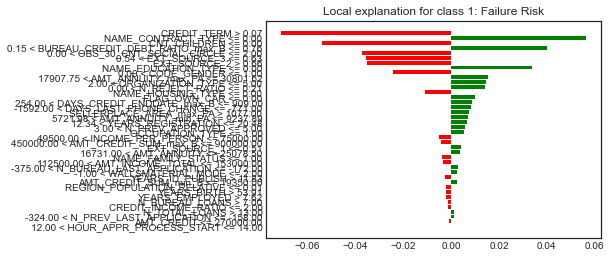

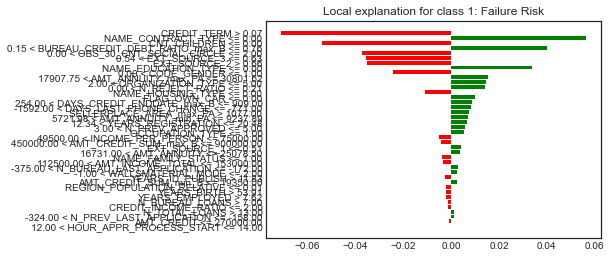

In [15]:
exp_test.as_pyplot_figure()

Green features support the prediction but we're looking for Class 1, therefore we need to revert the green and red features since we're looking for "failure to repay the loan".

Text(0.5, 1.0, 'Local explanation for class 1: Failure Risk')

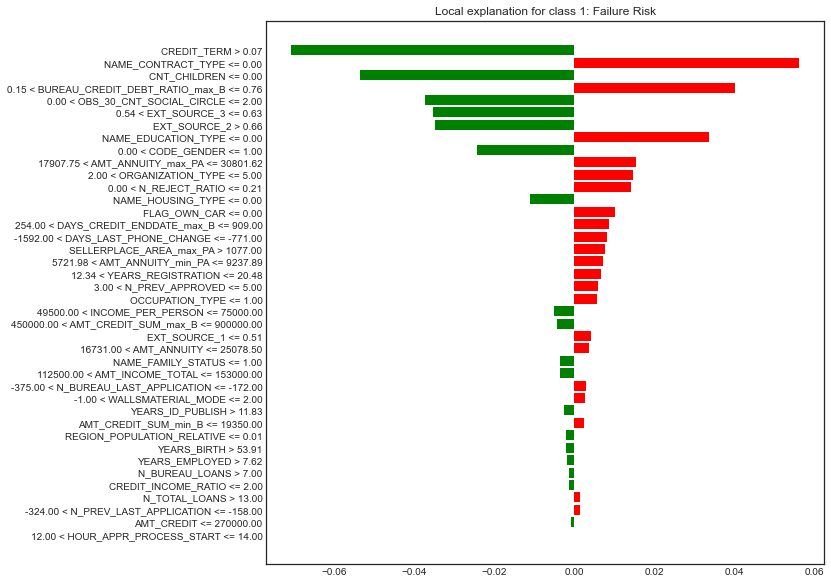

In [16]:
exp = exp_test.as_list()

vals = [x[1] for x in exp]
names = [x[0] for x in exp]

vals.reverse()
names.reverse()

pos = np.arange(len(exp)) #position

plt.figure(figsize=(10, 10))
plt.style.use('seaborn-white')

colors = ['red' if x > 0 else 'green' for x in vals]

plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
plt.title('Local explanation for class 1: Failure Risk') #we copy the name from the LIME output

In [17]:
map_test = exp_test.as_map()
cols = [item[0] for item in map_test[1]]
features_to_show = im_data.columns[cols].tolist()
df_lime = im_data.filter(features_to_show)
df_lime.loc[[rand_sample]]

CREDIT_TERM  NAME_CONTRACT_TYPE  CNT_CHILDREN  \
128002  0.098083     0                   0              

        BUREAU_CREDIT_DEBT_RATIO_max_B  OBS_30_CNT_SOCIAL_CIRCLE  \
128002  0.477781                        1.0                        

        EXT_SOURCE_3  EXT_SOURCE_2  NAME_EDUCATION_TYPE  CODE_GENDER  \
128002  0.578125      0.739258      0                    1             

        AMT_ANNUITY_max_PA  ORGANIZATION_TYPE  N_REJECT_RATIO  \
128002  26043.974609        4                  0.166626         

        NAME_HOUSING_TYPE  FLAG_OWN_CAR  DAYS_CREDIT_ENDDATE_max_B  \
128002  0                  0             353.0                       

        DAYS_LAST_PHONE_CHANGE  SELLERPLACE_AREA_max_PA  AMT_ANNUITY_min_PA  \
128002 -1016.0                  1422.0                   7469.595215          

        YEARS_REGISTRATION  N_PREV_APPROVED  OCCUPATION_TYPE  \
128002  13.757812           5.0              0                 

        INCOME_PER_PERSON  AMT_CREDIT_SUM_max_B  EXT_SOURCE_1  AMT_ANNUITY  \
128002  67500.0            495000.0              0.505859      19980.0       

        NAME_FAMILY_STATUS  AMT_INCOME_TOTAL  N_BUREAU_LAST_APPLICATION  \
128002  1                   135000.0         -193.0                       

        WALLSMATERIAL_MODE  YEARS_ID_PUBLISH  AMT_CREDIT_SUM_min_B  \
128002  2                   13.476562         17955.0                

        REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
128002  0.006233                    62.3125      31.125           

        N_BUREAU_LOANS  CREDIT_INCOME_RATIO  N_TOTAL_LOANS  \
128002  8.0             1.509766             14.0            

        N_PREV_LAST_APPLICATION  AMT_CREDIT  HOUR_APPR_PROCESS_START  
128002 -280.0                    203760.0    13

But can we get something to compare clients?

## Comparing classes

We'll check with a violinplot the class distribution for each feature.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

df_lime_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_lime.values), index=df_lime.index, columns=df_lime.columns)
minmax = MinMaxScaler().fit_transform(df_lime.values)
minmax_quantile = QuantileTransformer().fit_transform(minmax)
df_lime_quantile = pd.DataFrame(minmax_quantile, index=df_lime.index, columns=df_lime.columns)

<AxesSubplot:xlabel='value', ylabel='features'>

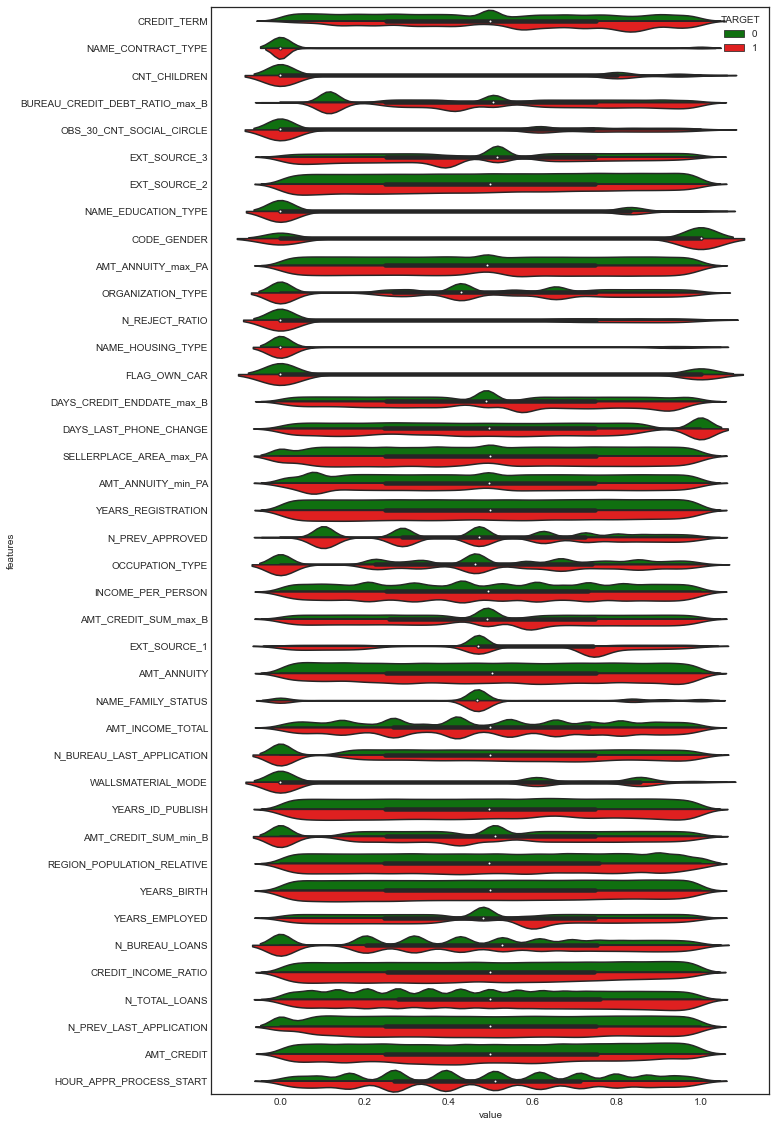

In [19]:
y = final['TARGET']
data = pd.concat([y, df_lime_quantile], axis=1)
data = pd.melt(data, id_vars='TARGET',
               var_name='features',
               value_name='value')

plt.figure(figsize=(10,20))
sns.violinplot(x='value', 
               y='features', 
               hue='TARGET', 
               palette=['green', 'red'], 
               data=data, 
               split=True, 
               scale='width',
              )

It's complicated to compare clients values with this kind of view...

## Neighbors

A more local comparison between clients.

In [20]:
df_lime.head()

CREDIT_TERM  NAME_CONTRACT_TYPE  CNT_CHILDREN  \
100001  0.036133     0                   0              
100002  0.060760     0                   0              
100003  0.027603     0                   0              
100004  0.049988     1                   0              
100005  0.078003     0                   0              

        BUREAU_CREDIT_DEBT_RATIO_max_B  OBS_30_CNT_SOCIAL_CIRCLE  \
100001  0.987402                        0.0                        
100002  0.546179                        2.0                        
100003  0.000000                        1.0                        
100004  0.000000                        0.0                        
100005  0.954793                        0.0                        

        EXT_SOURCE_3  EXT_SOURCE_2  NAME_EDUCATION_TYPE  CODE_GENDER  \
100001  0.159546      0.789551      1                    1             
100002  0.139404      0.262939      0                    0             
100003  0.535156      0.622070      1                    1             
100004  0.729492      0.556152      0                    0             
100005  0.432861      0.291748      0                    0             

        AMT_ANNUITY_max_PA  ORGANIZATION_TYPE  N_REJECT_RATIO  \
100001  3951.000000         13                 0.0              
100002  9251.775391         0                  0.0              
100003  98356.992188        1                  0.0              
100004  5357.250000         2                  0.0              
100005  4813.200195         9                  0.0              

        NAME_HOUSING_TYPE  FLAG_OWN_CAR  DAYS_CREDIT_ENDDATE_max_B  \
100001  0                  0             1778.0                      
100002  0                  0             780.0                       
100003  0                  0             1216.0                      
100004  0                  1            -382.0                       
100005  0                  0             1324.0                      

        DAYS_LAST_PHONE_CHANGE  SELLERPLACE_AREA_max_PA  AMT_ANNUITY_min_PA  \
100001 -1740.0                  23.0                     3951.000000          
100002 -1134.0                  500.0                    9251.775391          
100003 -828.0                   1400.0                   6737.310059          
100004 -815.0                   30.0                     5357.250000          
100005  0.0                     37.0                     4813.200195          

        YEARS_REGISTRATION  N_PREV_APPROVED  OCCUPATION_TYPE  \
100001  14.164062           1.0              12                
100002  9.992188            1.0              0                 
100003  3.250000            3.0              1                 
100004  11.671875           1.0              0                 
100005  24.984375           2.0              17                

        INCOME_PER_PERSON  AMT_CREDIT_SUM_max_B  EXT_SOURCE_1  AMT_ANNUITY  \
100001  67500.0            378000.000000         0.752441      20560.5       
100002  202500.0           450000.000000         0.083008      24700.5       
100003  135000.0           810000.000000         0.311279      35698.5       
100004  67500.0            94537.796875          0.505859      6750.0        
100005  49500.0            568800.000000         0.564941      17370.0       

        NAME_FAMILY_STATUS  AMT_INCOME_TOTAL  N_BUREAU_LAST_APPLICATION  \
100001  1                   135000.0         -49.0                        
100002  0                   202500.0         -103.0                       
100003  1                   270000.0         -606.0                       
100004  0                   67500.0          -408.0                       
100005  1                   99000.0          -62.0                        

        WALLSMATERIAL_MODE  YEARS_ID_PUBLISH  AMT_CREDIT_SUM_min_B  \
100001  0                   2.224609          85500.0                
100002  0                   5.808594          0.0                    
100003  1            

In [21]:
from sklearn.neighbors import NearestNeighbors
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

n_nn = 10

nearest_neighbors = NearestNeighbors(n_neighbors=n_nn, radius=0.3)
nearest_neighbors.fit(df_lime)

neighbors = nearest_neighbors.kneighbors(X=df_lime.loc[[rand_sample]], #current observation
                                         n_neighbors=n_nn+1, #it gives the X value in the 0 position so we need one more
                                         return_distance=False)

neighbors = np.delete(neighbors, 0)

df_lime['TARGET'] = final['TARGET']

neighbors_values_int = df_lime.iloc[neighbors].select_dtypes(include=['int8']).mean().round(0)
neighbors_values_float = df_lime.iloc[neighbors].select_dtypes(include=['float16', 'float32']).mean()
neighbors_values = pd.concat([neighbors_values_int, neighbors_values_float]).reindex(df_lime.columns.tolist())

neighbors_values = pd.DataFrame(neighbors_values,
                                index=df_lime.columns, 
                                columns=['neighbors_mean'])

neighbors_values

neighbors_mean
CREDIT_TERM                     0.057373      
NAME_CONTRACT_TYPE              0.000000      
CNT_CHILDREN                    0.000000      
BUREAU_CREDIT_DEBT_RATIO_max_B  0.964585      
OBS_30_CNT_SOCIAL_CIRCLE        2.599609      
EXT_SOURCE_3                    0.389648      
EXT_SOURCE_2                    0.475342      
NAME_EDUCATION_TYPE             0.000000      
CODE_GENDER                     1.000000      
AMT_ANNUITY_max_PA              22194.277344  
ORGANIZATION_TYPE               8.000000      
N_REJECT_RATIO                  0.201172      
NAME_HOUSING_TYPE               0.000000      
FLAG_OWN_CAR                    0.000000      
DAYS_CREDIT_ENDDATE_max_B       1152.000000   
DAYS_LAST_PHONE_CHANGE         -1031.000000   
SELLERPLACE_AREA_max_PA         718.000000    
AMT_ANNUITY_min_PA              5937.497559   
YEARS_REGISTRATION              14.234375     
N_PREV_APPROVED                 4.500000      
OCCUPATION_TYPE                 6.000000      
INCOME_PER_PERSON               63000.000000  
AMT_CREDIT_SUM_max_B            491966.562500 
EXT_SOURCE_1                    0.431641      
AMT_ANNUITY                     12040.650391  
NAME_FAMILY_STATUS              1.000000      
AMT_INCOME_TOTAL                130500.000000 
N_BUREAU_LAST_APPLICATION      -122.000000    
WALLSMATERIAL_MODE             -0.000000      
YEARS_ID_PUBLISH                9.859375      
AMT_CREDIT_SUM_min_B            15906.456055  
REGION_POPULATION_RELATIVE      0.018921      
YEARS_BIRTH                     48.687500     
YEARS_EMPLOYED                  6.109375      
N_BUREAU_LOANS                  8.703125      
CREDIT_INCOME_RATIO             1.632812      
N_TOTAL_LOANS                   14.796875     
N_PREV_LAST_APPLICATION        -250.750000    
AMT_CREDIT                      211201.203125 
HOUR_APPR_PROCESS_START         11.000000     
TARGET                          0.000000

In [22]:
client_values = df_lime.loc[[rand_sample]].T
client_values.columns = ['client'] #SK_ID_CURR
client_values

client
CREDIT_TERM                     0.098083     
NAME_CONTRACT_TYPE              0.000000     
CNT_CHILDREN                    0.000000     
BUREAU_CREDIT_DEBT_RATIO_max_B  0.477781     
OBS_30_CNT_SOCIAL_CIRCLE        1.000000     
EXT_SOURCE_3                    0.578125     
EXT_SOURCE_2                    0.739258     
NAME_EDUCATION_TYPE             0.000000     
CODE_GENDER                     1.000000     
AMT_ANNUITY_max_PA              26043.974609 
ORGANIZATION_TYPE               4.000000     
N_REJECT_RATIO                  0.166626     
NAME_HOUSING_TYPE               0.000000     
FLAG_OWN_CAR                    0.000000     
DAYS_CREDIT_ENDDATE_max_B       353.000000   
DAYS_LAST_PHONE_CHANGE         -1016.000000  
SELLERPLACE_AREA_max_PA         1422.000000  
AMT_ANNUITY_min_PA              7469.595215  
YEARS_REGISTRATION              13.757812    
N_PREV_APPROVED                 5.000000     
OCCUPATION_TYPE                 0.000000     
INCOME_PER_PERSON               67500.000000 
AMT_CREDIT_SUM_max_B            495000.000000
EXT_SOURCE_1                    0.505859     
AMT_ANNUITY                     19980.000000 
NAME_FAMILY_STATUS              1.000000     
AMT_INCOME_TOTAL                135000.000000
N_BUREAU_LAST_APPLICATION      -193.000000   
WALLSMATERIAL_MODE              2.000000     
YEARS_ID_PUBLISH                13.476562    
AMT_CREDIT_SUM_min_B            17955.000000 
REGION_POPULATION_RELATIVE      0.006233     
YEARS_BIRTH                     62.312500    
YEARS_EMPLOYED                  31.125000    
N_BUREAU_LOANS                  8.000000     
CREDIT_INCOME_RATIO             1.509766     
N_TOTAL_LOANS                   14.000000    
N_PREV_LAST_APPLICATION        -280.000000   
AMT_CREDIT                      203760.000000
HOUR_APPR_PROCESS_START         13.000000    
TARGET                          0.000000

In [23]:
class_1_values_int = df_lime[df_lime['TARGET'] == 1].select_dtypes(include=['int8']).mean().round(0)
class_1_values_float = df_lime[df_lime['TARGET'] == 1].select_dtypes(include=['float16', 'float32']).mean()
class_1_values = pd.concat([class_1_values_int, class_1_values_float]).reindex(df_lime.columns.tolist())
class_1_values = pd.DataFrame(class_1_values, 
                              index=df_lime.columns,
                              columns=['class_1_mean'])

class_0_values_int = df_lime[df_lime['TARGET'] == 0].select_dtypes(include=['int8']).mean().round(0)
class_0_values_float = df_lime[df_lime['TARGET'] == 0].select_dtypes(include=['float16', 'float32']).mean()
class_0_values = pd.concat([class_0_values_int, class_0_values_float]).reindex(df_lime.columns.tolist())
class_0_values = pd.DataFrame(class_0_values, 
                              index=df_lime.columns,
                              columns=['class_0_mean'])

classes_values = pd.concat([client_values, neighbors_values, class_0_values, class_1_values], axis=1)
classes_values.replace([-np.inf, np.inf], 1, inplace=True)
classes_values.fillna(0, inplace=True)

In [24]:
classes_values.T

CREDIT_TERM  NAME_CONTRACT_TYPE  CNT_CHILDREN  \
client          0.098083     0.0                 0.0            
neighbors_mean  0.057373     0.0                 0.0            
class_0_mean    0.000000     0.0                 0.0            
class_1_mean    0.000000     0.0                 0.0            

                BUREAU_CREDIT_DEBT_RATIO_max_B  OBS_30_CNT_SOCIAL_CIRCLE  \
client          0.477781                        1.000000                   
neighbors_mean  0.964585                        2.599609                   
class_0_mean    444.650452                      0.000000                   
class_1_mean    348.777283                      0.000000                   

                EXT_SOURCE_3  EXT_SOURCE_2  NAME_EDUCATION_TYPE  CODE_GENDER  \
client          0.578125      0.739258      0.0                  1.0           
neighbors_mean  0.389648      0.475342      0.0                  1.0           
class_0_mean    0.000000      0.000000      0.0                  1.0           
class_1_mean    0.000000      0.000000      0.0                  1.0           

                AMT_ANNUITY_max_PA  ORGANIZATION_TYPE  N_REJECT_RATIO  \
client          26043.974609        4.0                0.166626         
neighbors_mean  22194.277344        8.0                0.201172         
class_0_mean    23575.378906        10.0               0.000000         
class_1_mean    23943.318359        10.0               0.000000         

                NAME_HOUSING_TYPE  FLAG_OWN_CAR  DAYS_CREDIT_ENDDATE_max_B  \
client          0.0                0.0           353.0                       
neighbors_mean  0.0                0.0           1152.0                      
class_0_mean    0.0                0.0           0.0                         
class_1_mean    0.0                0.0           0.0                         

                DAYS_LAST_PHONE_CHANGE  SELLERPLACE_AREA_max_PA  \
client         -1016.0                  1422.000000               
neighbors_mean -1031.0                  718.000000                
class_0_mean    0.0                     938.732605                
class_1_mean    0.0                     914.702820                

                AMT_ANNUITY_min_PA  YEARS_REGISTRATION  N_PREV_APPROVED  \
client          7469.595215         13.757812           5.0               
neighbors_mean  5937.497559         14.234375           4.5               
class_0_mean    7837.830566         0.000000            0.0               
class_1_mean    7673.172852         0.000000            0.0               

                OCCUPATION_TYPE  INCOME_PER_PERSON  AMT_CREDIT_SUM_max_B  \
client          0.0              67500.000000       495000.0000            
neighbors_mean  6.0              63000.000000       491966.5625            
class_0_mean    5.0              93475.257812       909114.5000            
class_1_mean    5.0              95091.382812       938123.1250            

                EXT_SOURCE_1   AMT_ANNUITY  NAME_FAMILY_STATUS  \
client          0.505859      19980.000000  1.0                  
neighbors_mean  0.431641      12040.650391  1.0                  
class_0_mean    0.000000      27201.509766  1.0                  
class_1_mean    0.000000      28339.693359  1.0                  

                AMT_INCOME_TOTAL  N_BUREAU_LAST_APPLICATION  \
client          135000.00000     -193.0                       
neighbors_mean  130500.00000     -122.0                       
class_0_mean    169070.53125      0.0                         
class_1_mean    174274.75000      0.0                         

                WALLSMATERIAL_MODE  YEARS_ID_PUBLISH  AMT_CREDIT_SUM_min_B  \
client          2.0                 13.476562         17955.000000           
neighbors_mean -0.0                 9.859375          15906.456055           
class_0_mean    0.0                 0.000000          110229.195312          
class_1_mean    0.0                 0.000000          97305.671875           

                REGI

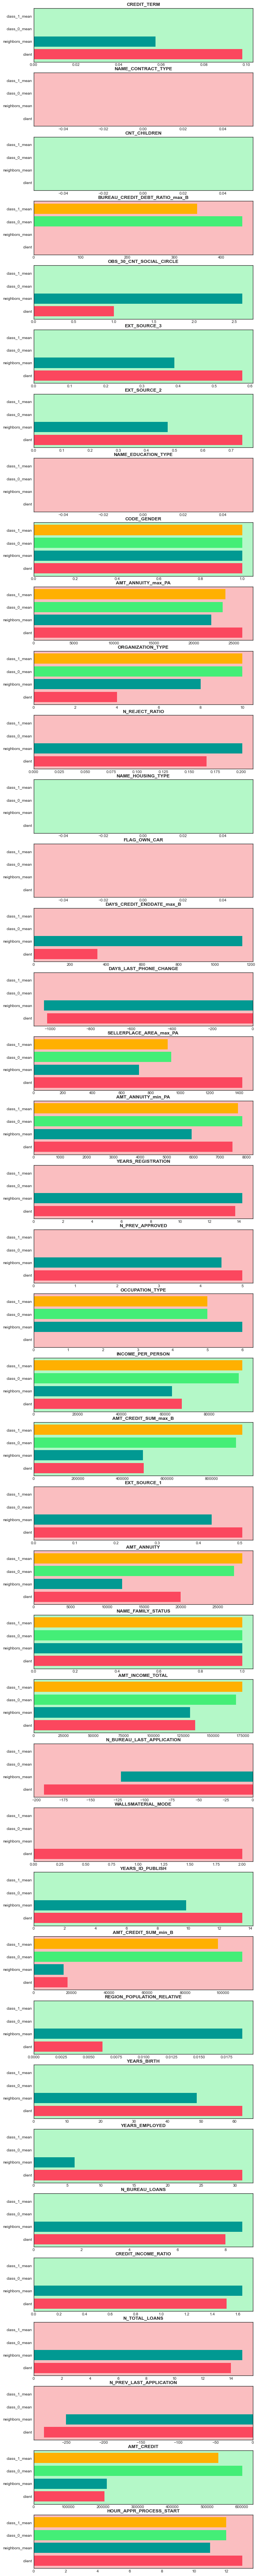

In [25]:
#Groups comparisons

vals = [x[1] for x in exp]
names = [x[0] for x in exp]
face_colors = ['#FABEC0' if x > 0 else '#B4F8C8' for x in vals]

colors = ('#FB475E', '#019992', '#44EE77', '#FFB001')

fig, ax = plt.subplots(classes_values.shape[0]-1, 
                        sharey='row', 
                        figsize=(10, 120))

for i in np.arange(0, classes_values.shape[0]-1):
    ax[i].barh(classes_values.T.index,
               classes_values.T.iloc[:, i],
               color=colors)
    ax[i].set_title(str(classes_values.index[i]), fontweight="bold")
    ax[i].patch.set_facecolor(face_colors[i])
plt.show()

# SHAP: SHapely Additive exPlanations

Another solution to blackbox models is the game-theoretic aprroach of SHAP to explain the output of any machine learning model with Shapely values (measures of contributions each feature has in the model).

Again, to interprete a model, it needs to be trained. All attributes need to be numeric and without any missing values, then we can do the train/test split. Finally, in our case, we used LGBMClassifier for the classification.

Now, we import SHAP to start interpreting.

In [26]:
help(shap.TreeExplainer)

Help on class Tree in module shap.explainers._tree:

class Tree(shap.explainers._explainer.Explainer)
 |  Tree(model, data=None, model_output='raw', feature_perturbation='interventional', feature_names=None, **deprecated_options)
 |  
 |  Uses Tree SHAP algorithms to explain the output of ensemble tree models.
 |  
 |  Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees,
 |  under several different possible assumptions about feature dependence. It depends on fast C++
 |  implementations either inside an externel model package or in the local compiled C extention.
 |  
 |  Method resolution order:
 |      Tree
 |      shap.explainers._explainer.Explainer
 |      shap._serializable.Serializable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, X, y=None, interactions=False, check_additivity=True)
 |      Explains the output of model(*args), where args is a list of parallel iteratable datasets.
 |      
 |      N

In [27]:
explainer_shap = shap.TreeExplainer(model=model,
                                    data=im_data.values,
#                                     model_output=' probability',
                                   ) #SHAP documentation for more details
explainer_shap

In [28]:
shap_values = explainer_shap.shap_values(im_data.values)

100%|===================| 356218/356251 [77:05<00:00]        

In [29]:
shap.initjs()

In [30]:
shap.force_plot(explainer_shap.expected_value, shap_values[rand_sample, :], im_data.iloc[rand_sample, :])

In [31]:
shap.force_plot(explainer_shap.expected_value, shap_values[:50, :], im_data.iloc[:50, :])

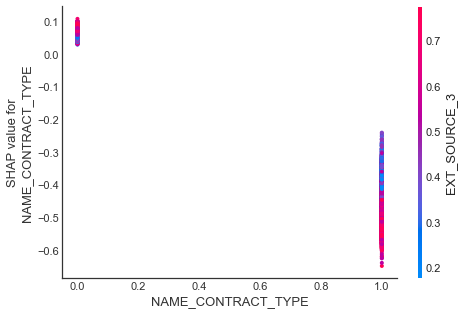

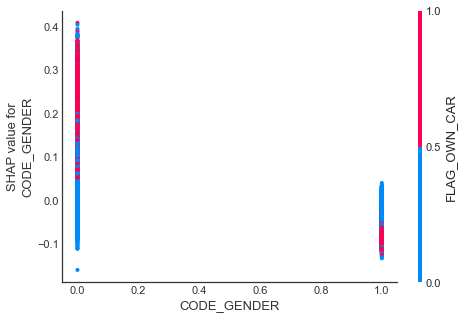

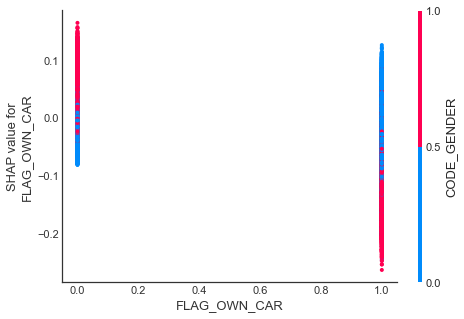

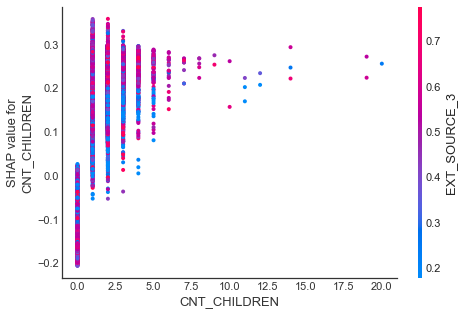

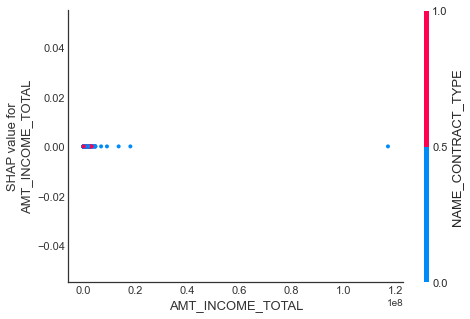

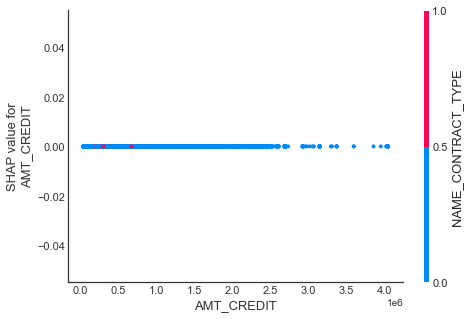

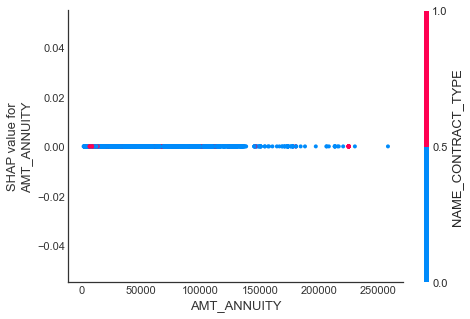

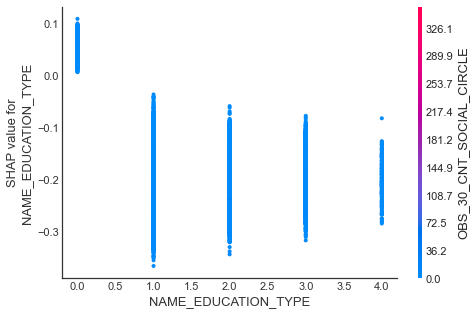

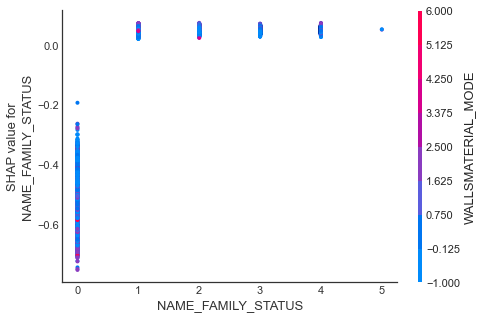

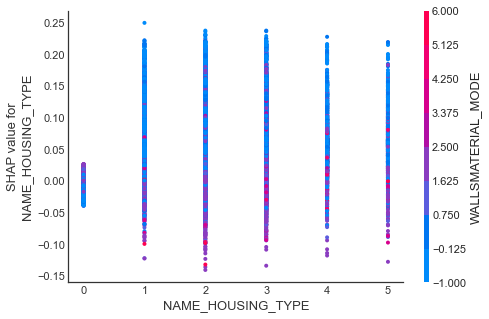

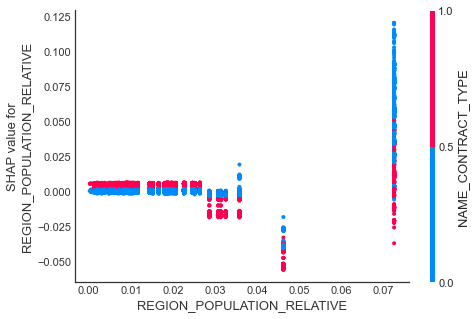

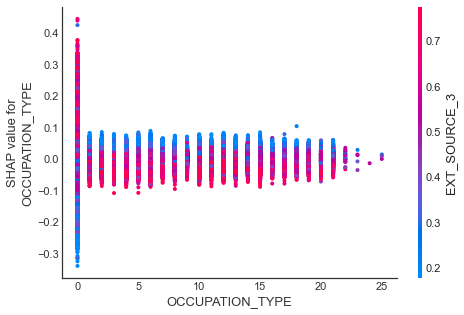

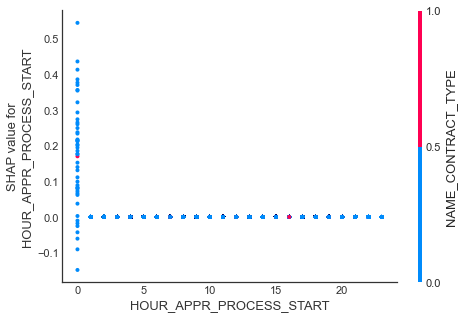

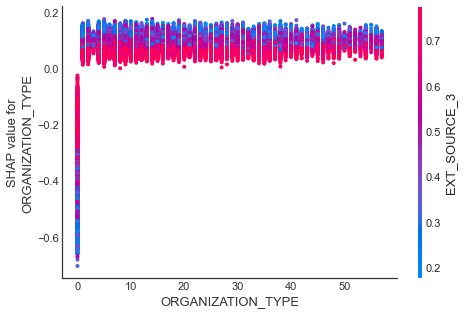

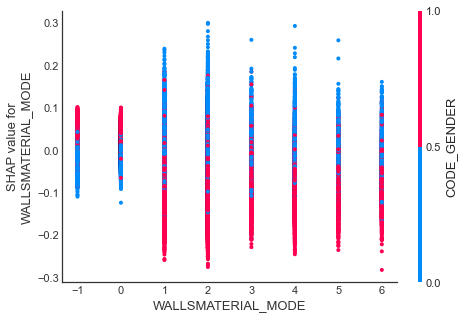

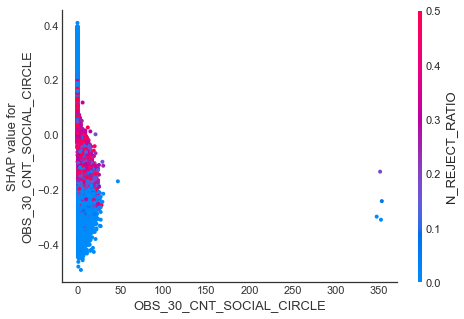

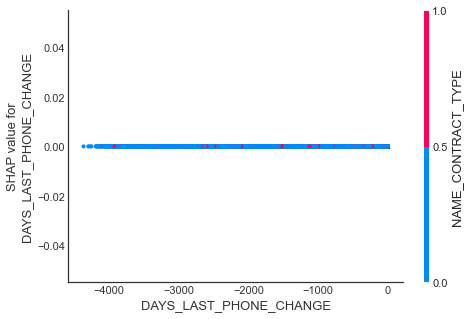

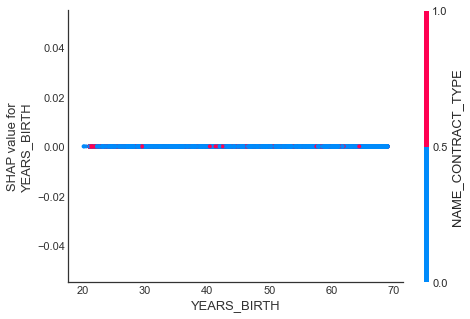

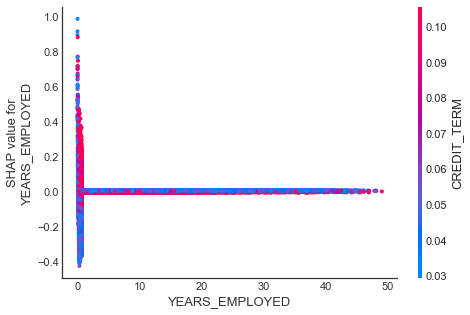

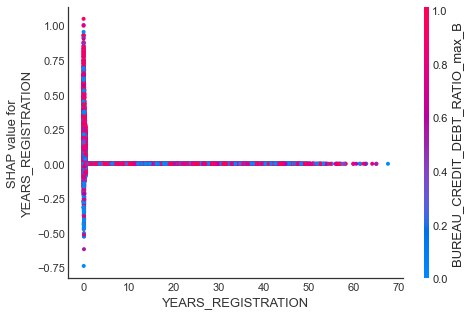

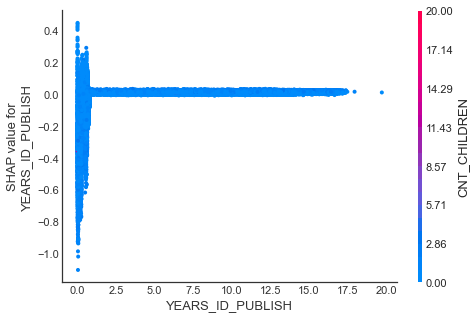

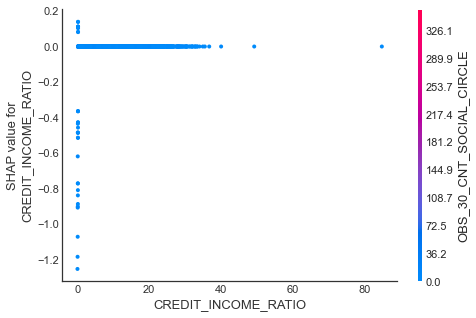

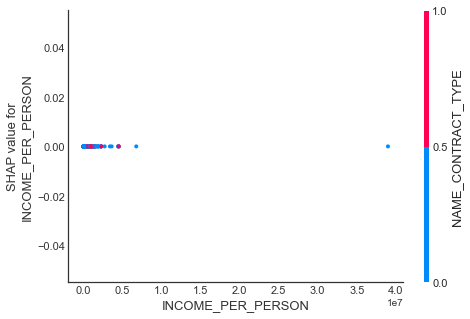

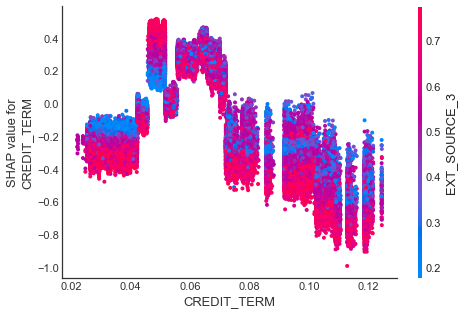

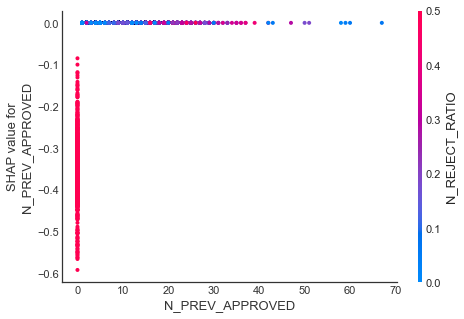

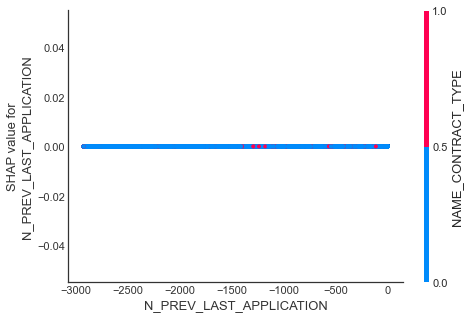

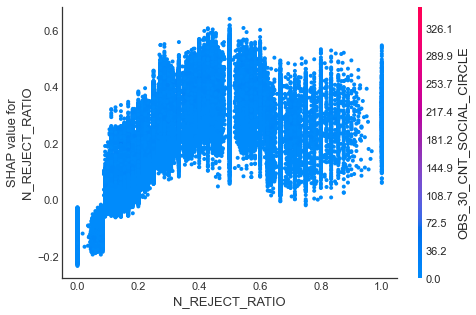

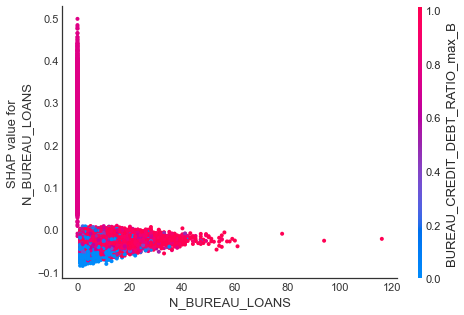

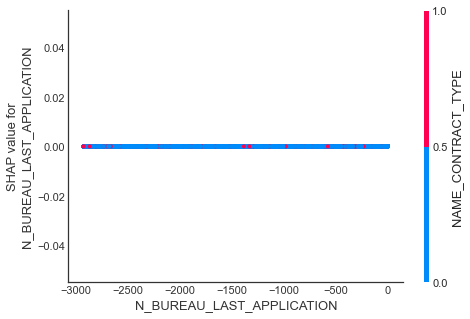

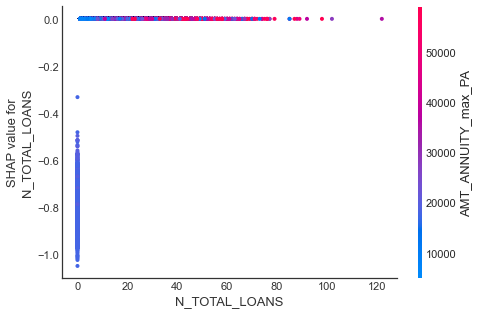

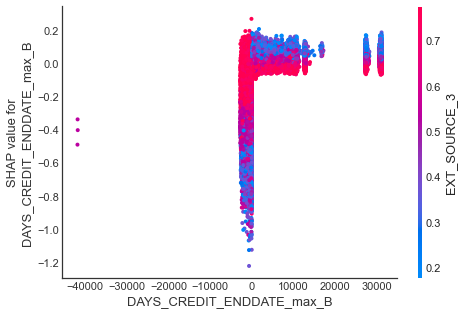

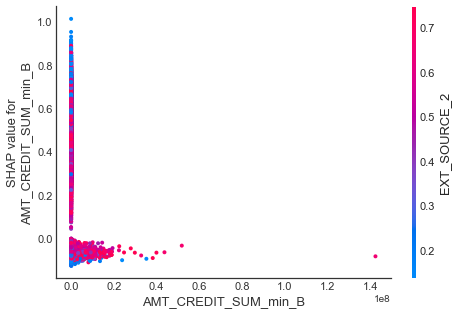

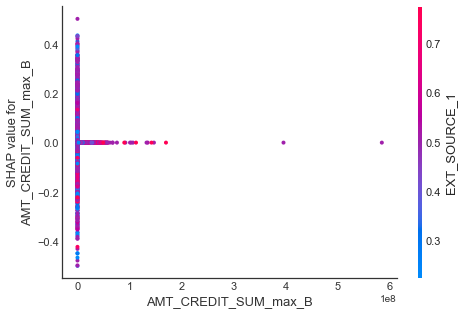

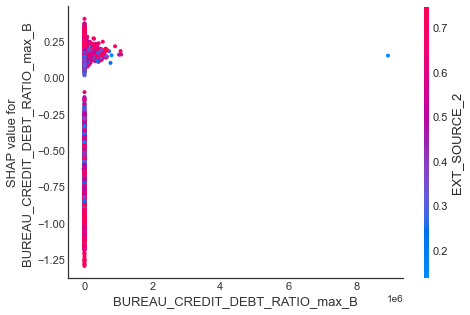

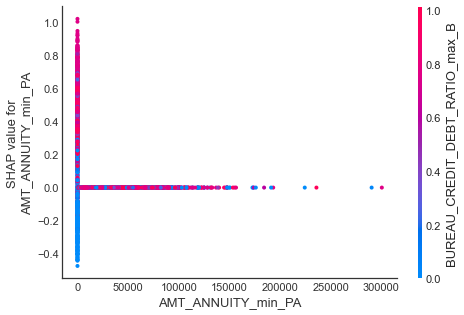

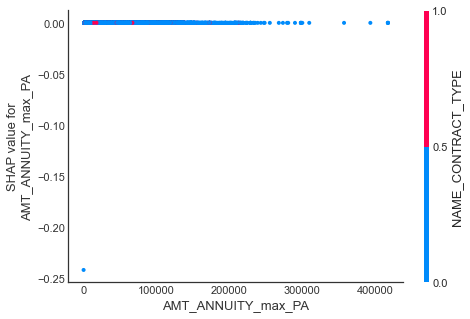

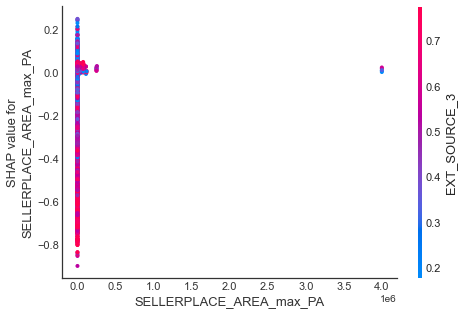

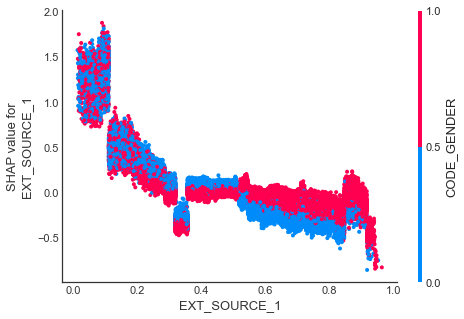

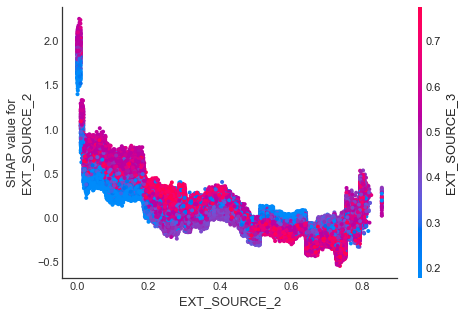

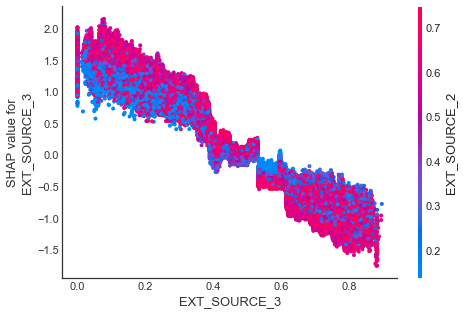

In [32]:
for col in im_data.columns.tolist():
    shap.dependence_plot(col, shap_values, im_data)

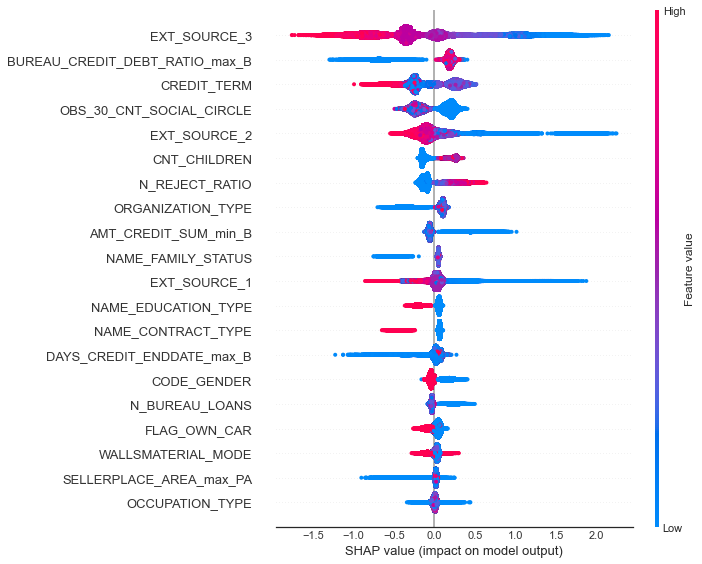

In [33]:
shap.summary_plot(shap_values, im_data)

- Low **EXT_SOURCE_1**, **EXT_SOURCE_2**, **EXT_SOURCE_3** increases the predicted **TARGET 0**.
- Credit term increases the **TARGET 1**. The more payment terms, higher the default risk.

In [34]:
# pickle.dump(explainer, open('lime_exp.sav', 'wb')) #Can't pickle lambda objects...
pickle.dump(explainer_shap, open('shap_exp.sav', 'wb'))
pickle.dump(shap_values, open('shap_val.pkl', 'wb'))